In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.sans-serif'] = 'Simhei'  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决显示问题

In [3]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

In [4]:
# 生成模型
x = np.arange(-200, -100, 1) # b
y = np.arange(-5, 5, 0.1) # w
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)  # 网格图
# plt.plot(X,Y,marker='.',linestyle='')
# plt.show()

In [5]:
# 得到loss数组Z
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


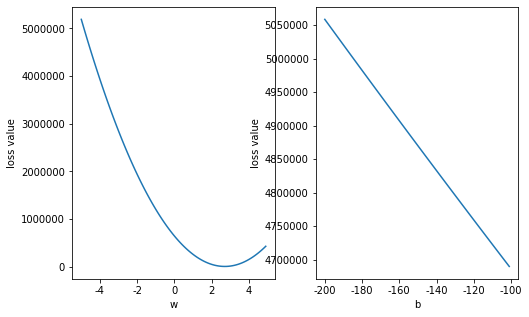

In [6]:
plt.figure(1,figsize=(8,5))
plt.subplot(121)
plt.plot(y,Z[:,1])
plt.xlabel('w')
plt.ylabel('loss value')
plt.subplot(122)
plt.plot(x,Z[1])
plt.xlabel('b')
plt.ylabel('loss value')
plt.show()

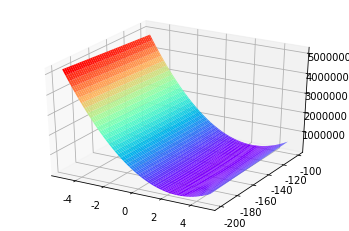

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
 
ax.plot_surface(Y, X, Z, cmap=plt.get_cmap('rainbow'))
# ax.contourf(Y, X, Z ,zdir='Z', cmap='rainbow')

plt.show()

Step 0, w: -2.7000, b: -138.7000, Loss: 37354430.0000
Step 10000, w: 2.6189, b: -170.8553, Loss: 102797.9855
Step 20000, w: 2.6530, b: -182.7017, Loss: 102028.2949
Step 30000, w: 2.6641, b: -186.5606, Loss: 101946.5044
Step 40000, w: 2.6677, b: -187.8212, Loss: 101937.7738
Step 50000, w: 2.6689, b: -188.2332, Loss: 101936.8414
Step 60000, w: 2.6693, b: -188.3678, Loss: 101936.7418
Step 70000, w: 2.6694, b: -188.4118, Loss: 101936.7312
Step 80000, w: 2.6694, b: -188.4262, Loss: 101936.7300
Step 90000, w: 2.6694, b: -188.4309, Loss: 101936.7299


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


大约需要时间： 1.4576663970947266


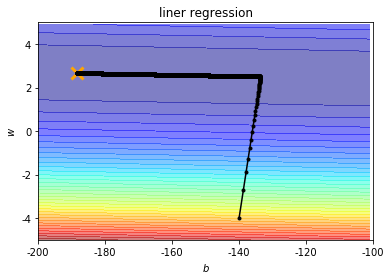

In [8]:
b = -140
w = -4
lr = 1.3
iteration = 100000

b_history = [b]
w_history = [w]
loss_history = []

lr_b = 0.0
lr_w = 0.0

import time
start = time.time()
for i in range(iteration):
    m = float(len(x_d))
    y_hat = w * x_d + b
    loss = np.dot(y_d - y_hat, y_d - y_hat) 
    grad_b = -2.0 * np.sum(y_d - y_hat) 
    grad_w = -2.0 * np.dot((y_d - y_hat), x_d) 
    
    lr_b += grad_b**2
    lr_w += grad_w**2
  
    b -= lr/np.sqrt(lr_b) * grad_b
    w -= lr/np.sqrt(lr_w) * grad_w
    
    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 10000 == 0:
        print("Step %i, w: %0.4f, b: %.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间：",end-start)

# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("liner regression")
plt.show()

In [148]:
np.min(loss_history)

101936.72992187637